教師なし学習（k-means）

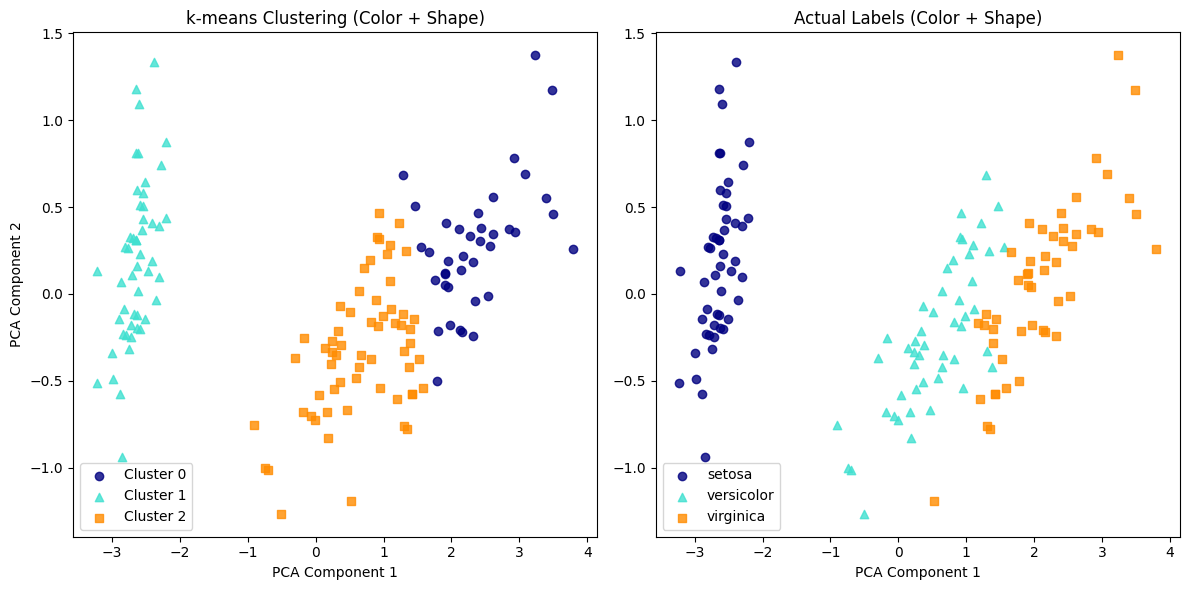

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# 1. データの読み込み
iris = load_iris()
X = iris.data
y = iris.target

# 2. k-meansモデルの作成と学習
model = KMeans(n_clusters=3, random_state=42, n_init='auto')
model.fit(X)
labels = model.labels_

# 3. 可視化用に次元圧縮
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 形状と色の設定
markers = ['o', '^', 's']  # 円、三角、四角
colors = ['navy', 'turquoise', 'darkorange']

plt.figure(figsize=(12, 6))

# 左側：k-meansによる分類結果
plt.subplot(1, 2, 1)
for i in range(3):
    plt.scatter(X_pca[labels == i, 0], X_pca[labels == i, 1],
                c=colors[i], marker=markers[i], label=f'Cluster {i}', alpha=0.8)
plt.title('k-means Clustering (Color + Shape)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()

# 右側：実際の正解ラベル
plt.subplot(1, 2, 2)
for i in range(3):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1],
                c=colors[i], marker=markers[i], label=iris.target_names[i], alpha=0.8)
plt.title('Actual Labels (Color + Shape)')
plt.xlabel('PCA Component 1')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

教師あり学習（SVM）

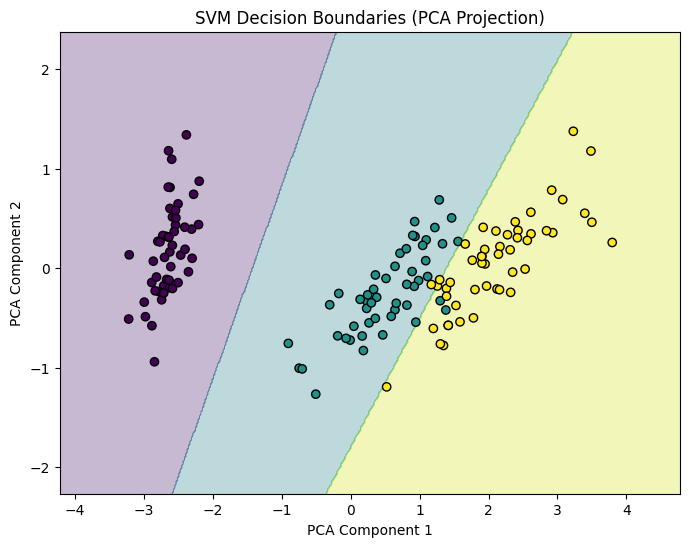

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.decomposition import PCA

# 1. データの準備
iris = load_iris()
X, y = iris.data, iris.target

# 2. 学習データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. SVMの学習 (Support Vector Classification)
# kernel='linear' で直線的な境界、'rbf' で複雑な曲線的な境界になります
svm = SVC(kernel='linear', C=1.0, random_state=42)
svm.fit(X_train, y_train)

# 4. 可視化のためにPCAで2次元に圧縮
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 5. 決定境界を描画するためのメッシュグリッド作成
h = .02
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# グリッド上の点を元の4次元空間に戻して予測
Z = svm.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)

# 6. プロット
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis') # 決定境界
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolors='k', cmap='viridis') # データ点
plt.title('SVM Decision Boundaries (PCA Projection)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

教師あり学習（LightGBM）

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000032 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 91
[LightGBM] [Info] Number of data points in the train set: 120, number of used features: 4
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.073920
[LightGBM] [Info] Start training from score -1.123930
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


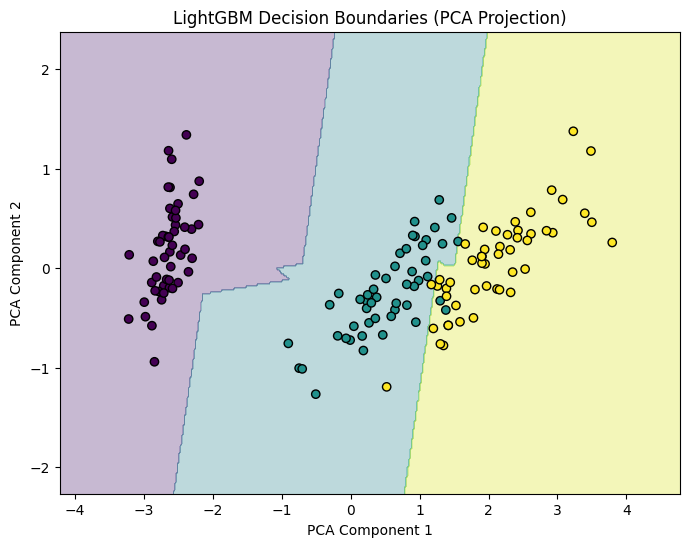

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.decomposition import PCA

# 1. データの準備
iris = load_iris()
X, y = iris.data, iris.target

# 2. 学習データとテストデータに分割（教師あり学習の基本ステップ）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. LightGBMの学習
lgbm = LGBMClassifier(random_state=42)
lgbm.fit(X_train, y_train)

# 4. 可視化のためにPCAで2次元に圧縮（モデルの挙動を確認するため）
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 5. 決定境界を描画するためのメッシュグリッド作成
h = .02
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# グリッド上の点を元の4次元空間に戻して予測（近似的な可視化）
Z = lgbm.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)

# 6. プロット
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis') # 決定境界の背景
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolors='k', cmap='viridis') # 実際のデータ点
plt.title('LightGBM Decision Boundaries (PCA Projection)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()